# MANEJO DE DATOS
https://colab.research.google.com/drive/1vqaPGdr0ikhc05sKukPFLSgK2yW6U0no#scrollTo=fBlGbQrr6Spi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ruta_data='credit_risk_dataset.csv'

In [3]:
df_credit = pd.read_csv(ruta_data)

In [4]:
df_credit

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [5]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
df_credit.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [7]:
df_credit.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

# Menejo de datos atípicos en edad y tiempo de trabajo de la persona

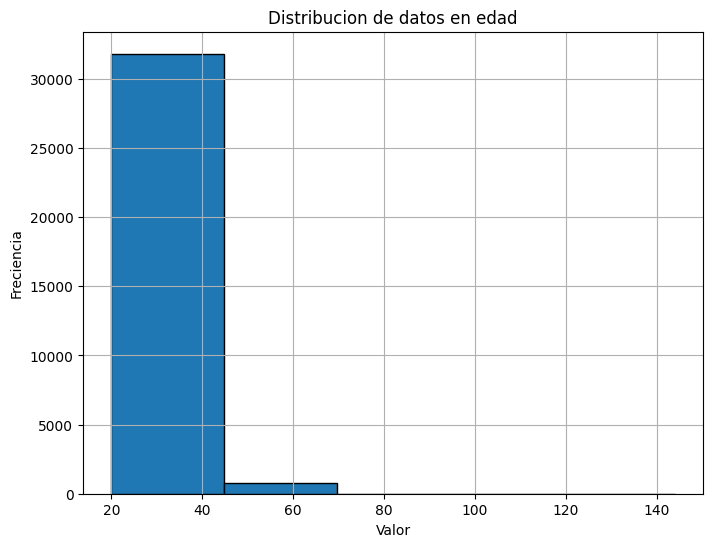

In [8]:
plt.figure(figsize=(8,6))
plt.hist(df_credit['person_age'], bins=5,edgecolor='black')
plt.title('Distribucion de datos en edad')
plt.xlabel('Valor')
plt.ylabel('Freciencia')
plt.grid(True)
plt.show()

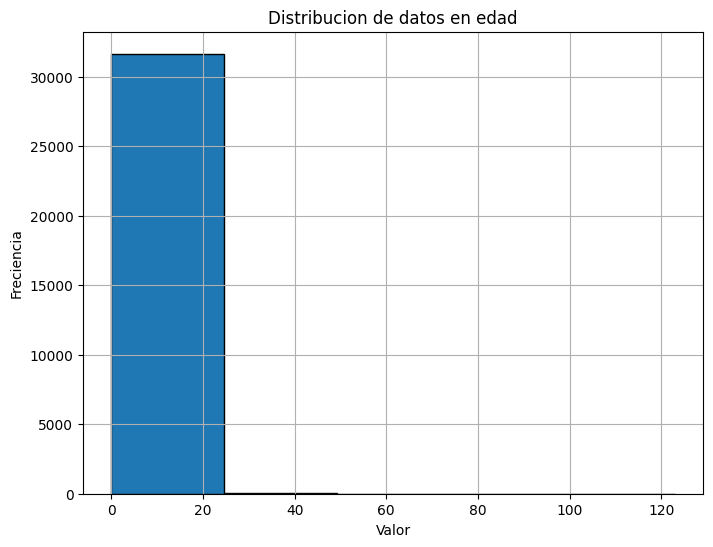

In [9]:
plt.figure(figsize=(8,6))
plt.hist(df_credit['person_emp_length'], bins=5,edgecolor='black')
plt.title('Distribucion de datos en edad')
plt.xlabel('Valor')
plt.ylabel('Freciencia')
plt.grid(True)
plt.show()

In [10]:
# Elegir registros edad en rango de 20 a 60 años , tiempo de trabajo en rango de 0 a 40 años
# filtro para columna edad

#df_credit_copia = df_credit.copy()

#df_credit_copia= df_credit.drop(df_credit[(df_credit['person_age'] > 60)].index & df_credit[(df_credit['person_emp_length']> 40)].index, inplace=True )

df_credit_copia = df_credit.drop(df_credit[(df_credit['person_age'] > 60) | (df_credit['person_emp_length'] > 40)].index)



In [11]:
df_credit_copia

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32574,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y,19
32575,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N,20
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19


In [12]:
df_credit_copia.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32509.000000,3.250900e+04,31615.000000,32509.000000,29404.000000,32509.000000,32509.000000,32509.000000
mean,27.640592,6.581250e+04,4.778871,9582.322588,11.011214,0.218093,0.170167,5.767111
std,5.956031,5.167087e+04,4.018175,6313.429762,3.240006,0.412958,0.106736,3.970010
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12150.000000,13.470000,0.000000,0.230000,8.000000
max,60.000000,2.039784e+06,38.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [13]:
df_credit_copia.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              894
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3105
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

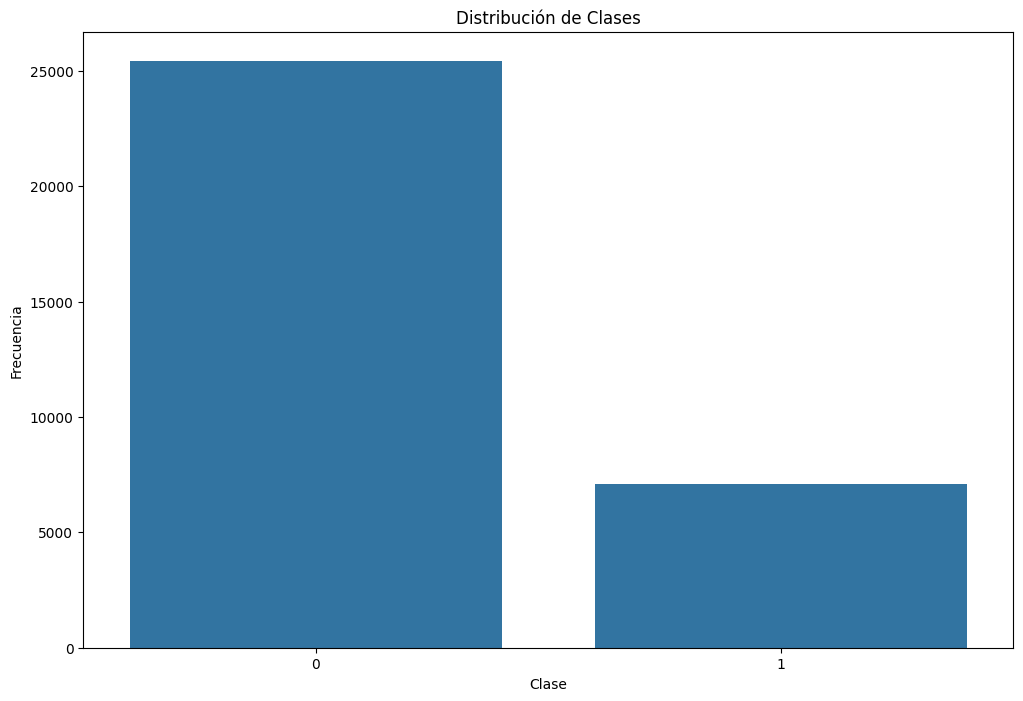

In [14]:
# ver comportamimiento de las clases en variable de interes

class_counts_c = df_credit_copia['loan_status'].value_counts()

# Graficar la distribución de las clases
plt.figure(figsize=(12, 8))
sns.barplot(x=class_counts_c.index, y=class_counts_c.values)
plt.title('Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
# Rotar las etiquetas en el eje x para mejorar la legibilidad
#plt.xticks(rotation=45)
plt.show()

In [15]:
class_counts_c

loan_status
0    25419
1     7090
Name: count, dtype: int64

In [16]:
df_data_1 = df_credit_copia[df_credit_copia['loan_status']==1]

#df_credit_copia = df_credit.drop(df_credit[(df_credit['person_age'] > 60) | (df_credit['person_emp_length'] > 40)].index)

In [17]:
df_data_1

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32561,54,129000,MORTGAGE,6.0,EDUCATION,B,9000,11.49,1,0.07,N,24
32563,52,71520,RENT,0.0,EDUCATION,E,7000,16.82,1,0.10,Y,24
32565,57,40000,RENT,1.0,MEDICAL,A,15000,8.90,1,0.38,N,21
32571,60,45600,RENT,1.0,VENTURE,B,20000,10.00,1,0.44,N,26


In [18]:
df_data_1.isnull().sum()

person_age                      0
person_income                   0
person_home_ownership           0
person_emp_length             282
loan_intent                     0
loan_grade                      0
loan_amnt                       0
loan_int_rate                 642
loan_status                     0
loan_percent_income             0
cb_person_default_on_file       0
cb_person_cred_hist_length      0
dtype: int64

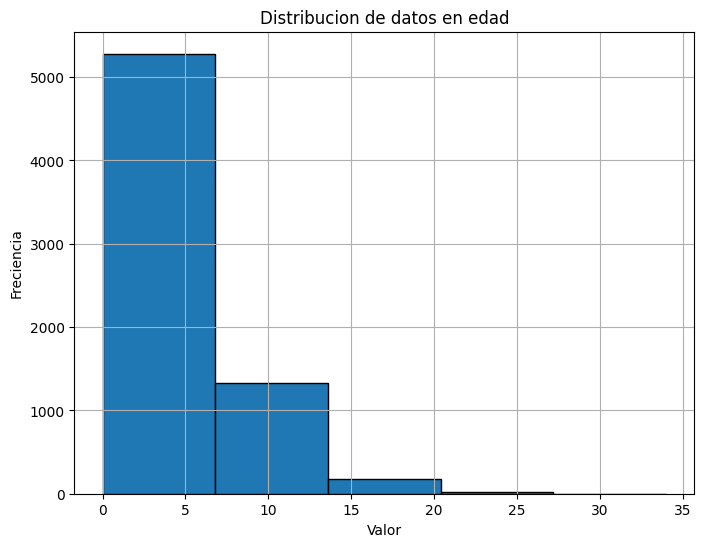

In [19]:
plt.figure(figsize=(8,6))
plt.hist(df_data_1['person_emp_length'], bins=5,edgecolor='black')
plt.title('Distribucion de datos en edad')
plt.xlabel('Valor')
plt.ylabel('Freciencia')
plt.grid(True)
plt.show()

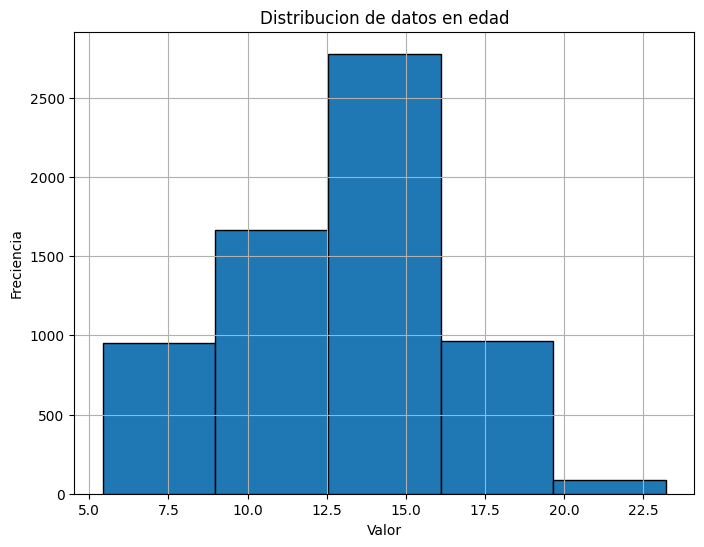

In [20]:
plt.figure(figsize=(8,6))
plt.hist(df_data_1['loan_int_rate'], bins=5,edgecolor='black')
plt.title('Distribucion de datos en edad')
plt.xlabel('Valor')
plt.ylabel('Freciencia')
plt.grid(True)
plt.show()

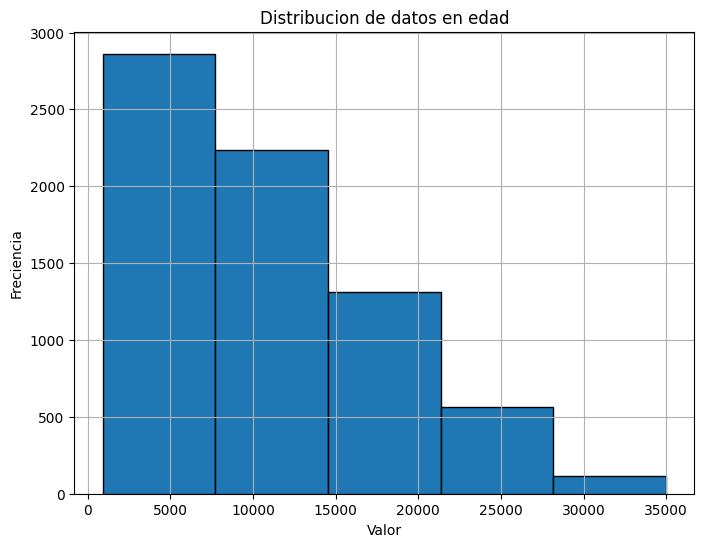

In [21]:
plt.figure(figsize=(8,6))
plt.hist(df_data_1['loan_amnt'], bins=5,edgecolor='black')
plt.title('Distribucion de datos en edad')
plt.xlabel('Valor')
plt.ylabel('Freciencia')
plt.grid(True)
plt.show()

In [22]:
df_credit_EN = df_credit_copia.dropna()

In [23]:
df_credit_EN

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32574,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y,19
32575,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N,20
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19


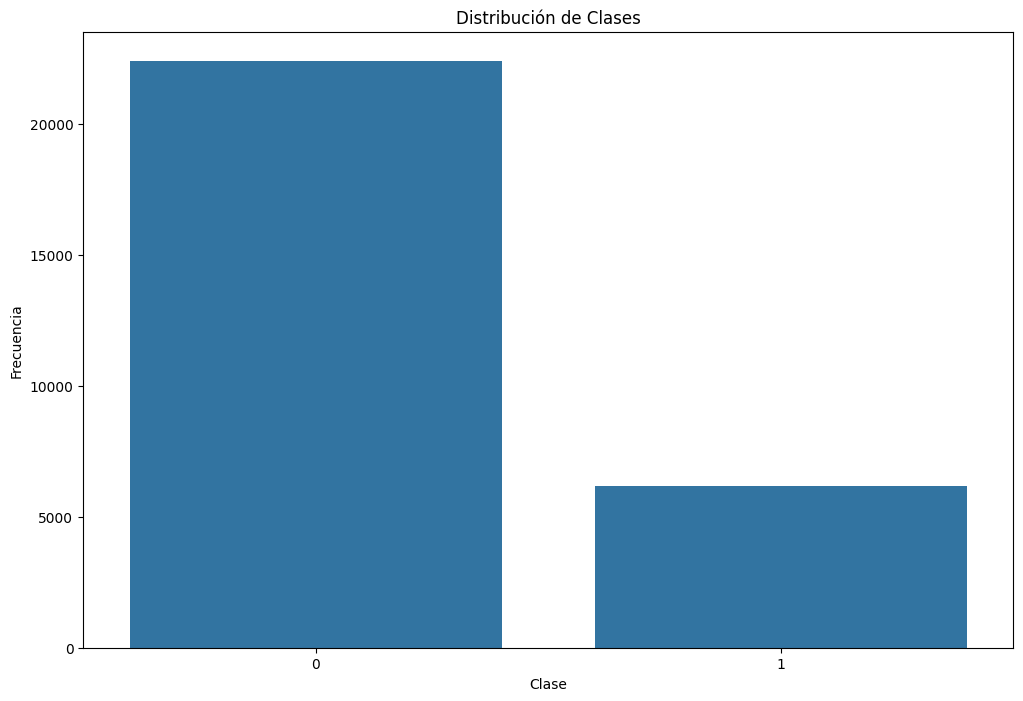

In [24]:
# ver comportamimiento de las clases en variable de interes

class_counts_EN = df_credit_EN['loan_status'].value_counts()

# Graficar la distribución de las clases
plt.figure(figsize=(12, 8))
sns.barplot(x=class_counts_EN.index, y=class_counts_EN.values)
plt.title('Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
# Rotar las etiquetas en el eje x para mejorar la legibilidad
#plt.xticks(rotation=45)
plt.show()

In [25]:
class_counts_EN

loan_status
0    22391
1     6187
Name: count, dtype: int64

In [26]:
# balanceo de datos de la variable objetivo

# apliar submuestreo de clase mayoritara

df_clase_0 = df_credit_EN[df_credit_EN['loan_status']==0]

df_clase_0

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
14,23,115000,RENT,2.0,EDUCATION,A,35000,7.90,0,0.30,N,4
15,23,500000,MORTGAGE,7.0,DEBTCONSOLIDATION,B,30000,10.65,0,0.06,N,3
16,23,120000,RENT,0.0,EDUCATION,A,35000,7.90,0,0.29,N,4
20,25,162500,RENT,2.0,VENTURE,A,35000,7.49,0,0.22,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32573,56,90000,MORTGAGE,0.0,PERSONAL,A,7200,6.17,0,0.08,N,19
32575,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N,20
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19


In [27]:
# seleccionar aleatoriamente
df_clase0_r = df_clase_0.sample(n=6187, random_state=42)

df_calse_1_n = df_credit_EN[df_credit_EN['loan_status']==1]

df_balanced_1 = pd.concat([df_clase0_r,df_calse_1_n])


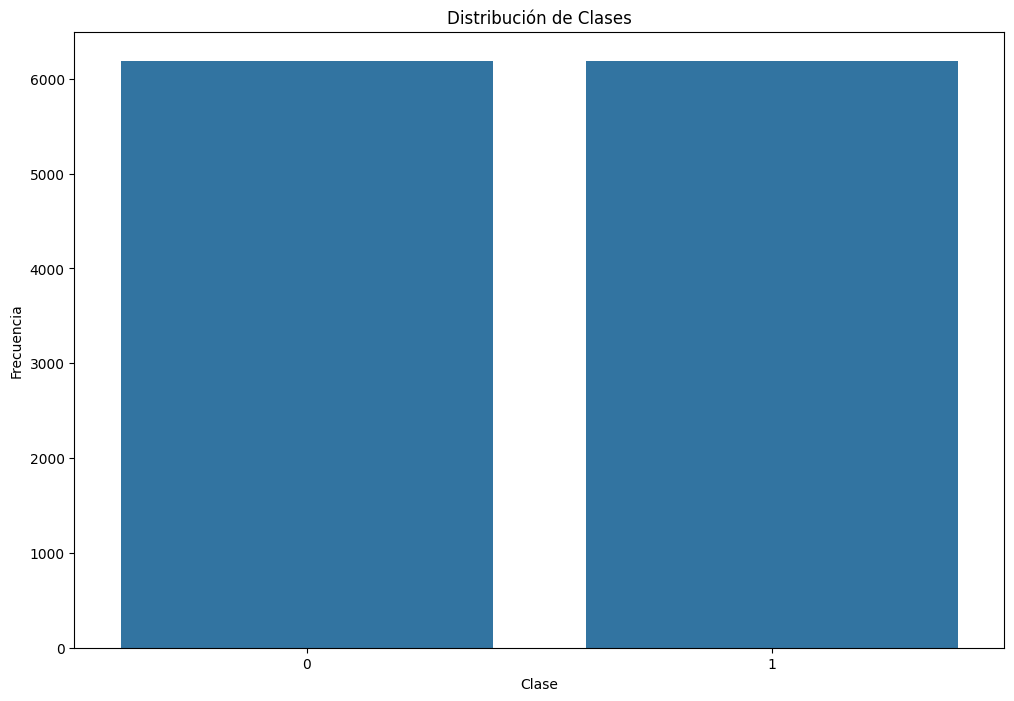

In [28]:
class_counts_b = df_balanced_1['loan_status'].value_counts()

# Graficar la distribución de las clases
plt.figure(figsize=(12, 8))
sns.barplot(x=class_counts_b.index, y=class_counts_b.values)
plt.title('Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
# Rotar las etiquetas en el eje x para mejorar la legibilidad
#plt.xticks(rotation=45)
plt.show()

# Normalizar datos, codificar categorias

In [29]:
# se escala la variable de tipo int o float

colum_num =['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length']
colum_cat = ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']

In [30]:
from sklearn.preprocessing import LabelEncoder # tranfromar datosd categoricos en numeros enteros
from sklearn.preprocessing import MinMaxScaler # herramienta para normalizar datos numericos en rango de 0 a 1

#encoder_cat = LabelEncoder()
encoder_num = MinMaxScaler()

# Aplica encoder numericoa a variables int y float
df_balanced_1[colum_num] = encoder_num.fit_transform(df_balanced_1[colum_num])

# Aplicar encoder categorico para tranfromar datos de texto en numero por columna

colum_in = df_balanced_1['person_home_ownership']
encoder_cat_1 = LabelEncoder()

encoder_cat_1.fit(colum_in)

mapeo_categorias_1 = dict(zip(encoder_cat_1.classes_, encoder_cat_1.transform(encoder_cat_1.classes_)))
# usar encoder para tranfromar categoria de columna de interes
colum_tran_1 = encoder_cat_1.transform(colum_in)

df_balanced_1['p_h_o_trans'] = colum_tran_1

#df_balanced_1[colum_cat] = encoder_cat.fit_transform(df_balanced_1[colum_cat])
mapeo_categorias_1


{'MORTGAGE': 0, 'OTHER': 1, 'OWN': 2, 'RENT': 3}

In [31]:
# Aplicar encoder categorico para tranfromar datos de texto en numero por columna

colum_in_2 = df_balanced_1['loan_intent']
encoder_cat_2 = LabelEncoder()

encoder_cat_2.fit(colum_in_2)

mapeo_categorias_2 = dict(zip(encoder_cat_2.classes_, encoder_cat_2.transform(encoder_cat_2.classes_)))
# usar encoder para tranfromar categoria de columna de interes
colum_tran_2 = encoder_cat_2.transform(colum_in_2)

df_balanced_1['loan_intent_trans'] = colum_tran_2
mapeo_categorias_2

{'DEBTCONSOLIDATION': 0,
 'EDUCATION': 1,
 'HOMEIMPROVEMENT': 2,
 'MEDICAL': 3,
 'PERSONAL': 4,
 'VENTURE': 5}

In [32]:
colum_in_3 = df_balanced_1['loan_grade']
encoder_cat_3 = LabelEncoder()

encoder_cat_3.fit(colum_in_3)

mapeo_categorias_3 = dict(zip(encoder_cat_3.classes_, encoder_cat_3.transform(encoder_cat_3.classes_)))
# usar encoder para tranfromar categoria de columna de interes
colum_tran_3 = encoder_cat_3.transform(colum_in_3)

df_balanced_1['loan_grade_trans'] = colum_tran_3
mapeo_categorias_3

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}

In [33]:
colum_in_4 = df_balanced_1['cb_person_default_on_file']
encoder_cat_4 = LabelEncoder()

encoder_cat_4.fit(colum_in_4)

mapeo_categorias_4 = dict(zip(encoder_cat_4.classes_, encoder_cat_4.transform(encoder_cat_4.classes_)))
# usar encoder para tranfromar categoria de columna de interes
colum_tran_4 = encoder_cat_4.transform(colum_in_4)

df_balanced_1['cb_pdf_trans'] = colum_tran_4
mapeo_categorias_4

{'N': 0, 'Y': 1}

In [34]:
df_balanced_1

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,p_h_o_trans,loan_intent_trans,loan_grade_trans,cb_pdf_trans
19386,0.275,0.018106,RENT,0.058824,PERSONAL,B,0.065693,0.310674,0,0.128205,N,0.214286,3,4,1,0
2691,0.150,0.020752,MORTGAGE,0.264706,VENTURE,A,0.398540,0.138202,0,0.551282,N,0.035714,0,5,0,0
16515,0.125,0.024022,MORTGAGE,0.205882,HOMEIMPROVEMENT,A,0.211679,0.034270,0,0.269231,N,0.035714,0,2,0,0
10337,0.100,0.043872,OWN,0.058824,MEDICAL,B,0.445255,0.408427,0,0.307692,N,0.071429,2,3,1,0
32362,0.800,0.030641,RENT,0.088235,MEDICAL,C,0.299270,0.410674,0,0.294872,N,0.714286,3,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32561,0.850,0.087047,MORTGAGE,0.176471,EDUCATION,B,0.240876,0.341011,1,0.089744,N,0.785714,0,1,1,0
32563,0.800,0.047019,RENT,0.000000,EDUCATION,E,0.182482,0.640449,1,0.128205,Y,0.785714,3,1,4,1
32565,0.925,0.025070,RENT,0.029412,MEDICAL,A,0.416058,0.195506,1,0.487179,N,0.678571,3,3,0,0
32571,1.000,0.028969,RENT,0.029412,VENTURE,B,0.562044,0.257303,1,0.564103,N,0.857143,3,5,1,0


In [35]:
# definir variables de entrada o matriz "X" y variable objetivo o "y"

#X= df_balanced_1.drop(columns=colum_cat)

#X = df_balanced_1.drop('person_home_ownership', axis=1)
#X = df_balanced_1.drop('cb_person_default_on_file', axis=1)
#X = df_balanced_1.drop('loan_intent', axis=1)
#X = df_balanced_1.drop('loan_grade', axis=1)
X = df_balanced_1.drop('loan_status', axis=1)

In [36]:
X = X.drop('person_home_ownership', axis=1)

In [37]:
X = X.drop('cb_person_default_on_file', axis=1)

In [38]:
X = X.drop('loan_intent', axis=1)

In [39]:
X = X.drop('loan_grade', axis=1)

In [40]:
y = df_balanced_1['loan_status'] # variable objetivo

In [41]:
X

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,p_h_o_trans,loan_intent_trans,loan_grade_trans,cb_pdf_trans
19386,0.275,0.018106,0.058824,0.065693,0.310674,0.128205,0.214286,3,4,1,0
2691,0.150,0.020752,0.264706,0.398540,0.138202,0.551282,0.035714,0,5,0,0
16515,0.125,0.024022,0.205882,0.211679,0.034270,0.269231,0.035714,0,2,0,0
10337,0.100,0.043872,0.058824,0.445255,0.408427,0.307692,0.071429,2,3,1,0
32362,0.800,0.030641,0.088235,0.299270,0.410674,0.294872,0.714286,3,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...
32561,0.850,0.087047,0.176471,0.240876,0.341011,0.089744,0.785714,0,1,1,0
32563,0.800,0.047019,0.000000,0.182482,0.640449,0.128205,0.785714,3,1,4,1
32565,0.925,0.025070,0.029412,0.416058,0.195506,0.487179,0.678571,3,3,0,0
32571,1.000,0.028969,0.029412,0.562044,0.257303,0.564103,0.857143,3,5,1,0


In [42]:
y

19386    0
2691     0
16515    0
10337    0
32362    0
        ..
32561    1
32563    1
32565    1
32571    1
32574    1
Name: loan_status, Length: 12374, dtype: int64

# Corte de conjutno de datos entrenamiento y prueba

In [43]:
from sklearn.model_selection import train_test_split

# División del conjutno de datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42 )

print('Conjunto de datos de entrada de entrenamiento', X_train.shape)
print('Conjunto de datos de salida de entrenamiento', y_train.shape)

print('Conjunto de datos de entrada de prueba', X_test.shape)
print('Conjunto de datos de salida de prueba', y_test.shape)

Conjunto de datos de entrada de entrenamiento (9899, 11)
Conjunto de datos de salida de entrenamiento (9899,)
Conjunto de datos de entrada de prueba (2475, 11)
Conjunto de datos de salida de prueba (2475,)


# Entrenar modelo de machine learning

In [44]:
#importar modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [45]:
# definir los mdoelos
model_dt = DecisionTreeClassifier()

model_svc = SVC()

model_rfc = RandomForestClassifier()

In [46]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
y_pred = model_dt.predict(X_test)

In [48]:
accuracy = accuracy_score( y_test, y_pred)

In [49]:
print('Exactitud del modelo DecisionTreeClassifier = ', accuracy)

Exactitud del modelo DecisionTreeClassifier =  0.7947474747474748
